# US Accidents

# Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df_USA=pd.read_csv(r'C:\Users\DELL\Desktop\US_Accidents.csv')

In [4]:
df_USA.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,08-02-2016 00:37,08-02-2016 06:37,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,08-02-2016 05:56,08-02-2016 11:56,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,08-02-2016 06:15,08-02-2016 12:15,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,08-02-2016 06:15,08-02-2016 12:15,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,08-02-2016 06:51,08-02-2016 12:51,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day


In [5]:
df_USA.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [6]:
df_USA.dtypes.value_counts()

object     20
float64    13
bool       13
int64       1
Name: count, dtype: int64

In [7]:
df_USA.shape

(1048575, 47)

In [8]:
df_USA.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,360065.000000,1.017832e+06,813974.000000,1.015803e+06,1.023115e+06,1.017760e+06,980665.000000,789334.000000
mean,2.164623e+00,3.646292e+01,-9.720202e+01,3.646305e+01,-9.720181e+01,5.867531e-01,7869.769653,5.915797e+01,55.283185,6.553987e+01,2.951557e+01,9.098803e+00,7.464395,0.007445
std,5.460908e-01,5.165882e+00,1.831984e+01,5.165957e+00,1.831963e+01,1.601684e+00,15619.751306,1.778244e+01,20.048839,2.298438e+01,9.907375e-01,2.718757e+00,5.810570,0.114932
min,1.000000e+00,2.457058e+01,-1.244975e+02,2.457433e+01,-1.244975e+02,0.000000e+00,1.000000,-8.900000e+01,-89.000000,2.000000e+00,2.000000e-02,0.000000e+00,0.000000,0.000000
25%,2.000000e+00,3.371034e+01,-1.180358e+02,3.371188e+01,-1.180361e+02,0.000000e+00,1175.000000,4.700000e+01,42.000000,4.900000e+01,2.934000e+01,1.000000e+01,3.500000,0.000000
50%,2.000000e+00,3.635720e+01,-9.292586e+01,3.635665e+01,-9.292828e+01,1.380000e-01,3771.000000,6.000000e+01,57.000000,6.900000e+01,2.985000e+01,1.000000e+01,7.000000,0.000000
75%,2.000000e+00,4.023489e+01,-8.038426e+01,4.023471e+01,-8.038469e+01,5.910000e-01,9229.000000,7.300000e+01,70.000000,8.500000e+01,3.002000e+01,1.000000e+01,10.400000,0.000000
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,961005.000000,1.292000e+02,113.000000,1.000000e+02,5.804000e+01,1.200000e+02,984.000000,24.000000


In [9]:
df_USA.State.unique

<bound method Series.unique of 0          OH
1          OH
2          OH
3          OH
4          OH
           ..
1048570    CA
1048571    CA
1048572    CA
1048573    CA
1048574    CA
Name: State, Length: 1048575, dtype: object>

In [10]:
df1=df_USA[df_USA['State']=='CA']

In [11]:
df1['IDD'] = df1['ID'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9596\1955134751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['IDD'] = df1['ID'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)


In [12]:
df1

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,IDD
1012,A-2717612,3,22-03-2016 18:53,23-03-2016 00:53,38.825840,-120.029214,38.827194,-120.030632,0.121,Between Twin Bridges Tract and South Lake Taho...,...,False,False,False,False,False,Day,Day,Day,Day,2717612
1013,A-2717613,2,22-03-2016 19:00,23-03-2016 01:00,37.358209,-121.840017,37.361596,-121.842044,0.259,Between Capitol Expy and Alum Rock Ave - Accid...,...,False,False,False,False,False,Day,Day,Day,Day,2717613
1014,A-2717614,3,22-03-2016 20:07,23-03-2016 02:07,37.881943,-122.307987,37.885882,-122.308878,0.276,At I-80/I-580 Northern Split - Accident.,...,False,False,False,False,False,Night,Night,Day,Day,2717614
1015,A-2717615,2,22-03-2016 21:40,23-03-2016 03:40,37.881038,-122.307788,37.883458,-122.308366,0.170,At I-80/I-580 Northern Split - Accident.,...,False,False,False,False,False,Night,Night,Night,Night,2717615
1016,A-2717616,2,22-03-2016 21:36,23-03-2016 03:36,38.518811,-121.101664,38.518811,-121.101664,0.000,Between Latrobe Rd/Indio Dr and Latrobe Rd - A...,...,False,False,False,False,False,Night,Night,Night,Night,2717616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,A-3771908,2,10-12-2019 17:05,10-12-2019 17:58,33.195825,-117.367005,33.195825,-117.367005,0.000,At Oceanside Blvd/Exit 52 - Accident.,...,False,False,False,False,False,Night,Day,Day,Day,3771908
1048571,A-3771909,2,10-12-2019 17:02,10-12-2019 18:33,33.901813,-117.466712,33.901813,-117.466712,0.000,At La Sierra Ave - Accident.,...,False,False,False,False,False,Night,Day,Day,Day,3771909
1048572,A-3771910,2,10-12-2019 17:11,10-12-2019 18:24,33.651594,-117.761153,33.651594,-117.761153,0.000,At CA-133/Laguna Fwy/Exit 2 - Accident.,...,False,False,False,False,False,Night,Night,Day,Day,3771910
1048573,A-3771911,2,10-12-2019 17:04,10-12-2019 20:19,35.419703,-119.012848,35.419703,-119.012848,0.000,At E Roberts Ln - Accident.,...,False,False,False,True,False,Night,Day,Day,Day,3771911


In [13]:
df1.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,IDD
1012,A-2717612,3,22-03-2016 18:53,23-03-2016 00:53,38.825840,-120.029214,38.827194,-120.030632,0.121,Between Twin Bridges Tract and South Lake Taho...,...,False,False,False,False,False,Day,Day,Day,Day,2717612
1013,A-2717613,2,22-03-2016 19:00,23-03-2016 01:00,37.358209,-121.840017,37.361596,-121.842044,0.259,Between Capitol Expy and Alum Rock Ave - Accid...,...,False,False,False,False,False,Day,Day,Day,Day,2717613
1014,A-2717614,3,22-03-2016 20:07,23-03-2016 02:07,37.881943,-122.307987,37.885882,-122.308878,0.276,At I-80/I-580 Northern Split - Accident.,...,False,False,False,False,False,Night,Night,Day,Day,2717614
1015,A-2717615,2,22-03-2016 21:40,23-03-2016 03:40,37.881038,-122.307788,37.883458,-122.308366,0.170,At I-80/I-580 Northern Split - Accident.,...,False,False,False,False,False,Night,Night,Night,Night,2717615
1016,A-2717616,2,22-03-2016 21:36,23-03-2016 03:36,38.518811,-121.101664,38.518811,-121.101664,0.000,Between Latrobe Rd/Indio Dr and Latrobe Rd - A...,...,False,False,False,False,False,Night,Night,Night,Night,2717616


In [14]:
df1.shape

(307801, 48)

In [15]:
df1.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'IDD'],
      dtype='object')

In [16]:
df1.duplicated().sum()

0

In [17]:
d1f=df1.dropna(subset=['Precipitation(in)'])  

In [18]:
df1.shape

(307801, 48)

In [19]:
df1=df1.dropna(subset=['Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Direction', 'Wind_Speed(mph)',
                      'Weather_Condition'])

In [20]:
df1.shape

(239326, 48)

In [21]:
df1.isna().sum()/len(df1)*100

ID                        0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                   0.000000
End_Lng                   0.000000
Distance(mi)              0.000000
Description               0.000000
Number                   71.485338
Street                    0.000000
Side                      0.000000
City                      0.001671
County                    0.000000
State                     0.000000
Zipcode                   0.000000
Country                   0.000000
Timezone                  0.000000
Airport_Code              0.000000
Weather_Timestamp         0.000000
Temperature(F)            0.000000
Wind_Chill(F)             0.000000
Humidity(%)               0.000000
Pressure(in)              0.000000
Visibility(mi)            0.000000
Wind_Direction            0.000000
Wind_Speed(mph)           0.000000
Precipitation(in)   

In [22]:
df1=df1.dropna(subset=['City','Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'])

In [23]:
df1.isna().sum()/len(df1)*100

ID                        0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                   0.000000
End_Lng                   0.000000
Distance(mi)              0.000000
Description               0.000000
Number                   71.484861
Street                    0.000000
Side                      0.000000
City                      0.000000
County                    0.000000
State                     0.000000
Zipcode                   0.000000
Country                   0.000000
Timezone                  0.000000
Airport_Code              0.000000
Weather_Timestamp         0.000000
Temperature(F)            0.000000
Wind_Chill(F)             0.000000
Humidity(%)               0.000000
Pressure(in)              0.000000
Visibility(mi)            0.000000
Wind_Direction            0.000000
Wind_Speed(mph)           0.000000
Precipitation(in)   

In [24]:
df1['Weather_Condition'].value_counts()

Weather_Condition
Fair                            138092
Cloudy                           28448
Mostly Cloudy                    21871
Partly Cloudy                    16768
Light Rain                        9973
Haze                              7103
Fog                               5236
Rain                              3840
Smoke                             1697
Heavy Rain                        1581
Fair / Windy                      1507
Clear                              402
Light Snow                         348
Partly Cloudy / Windy              329
Mostly Cloudy / Windy              243
Cloudy / Windy                     162
Snow                               155
Light Rain / Windy                 135
Drizzle                            123
Patches of Fog                     120
Overcast                           114
Mist                               112
Light Drizzle                      104
T-Storm                             92
Shallow Fog                         79
Thunder

In [25]:
df1.Side.unique()

array(['R', 'L'], dtype=object)

In [26]:
df_cat=df1.select_dtypes('object')
df_num=df1.select_dtypes(np.number)
df_cat=df_cat.drop('ID',axis=1)

In [27]:
df_cat=df1.select_dtypes('object')
col_name=[]
length=[]

for i in df_cat.columns:
    col_name.append(i)
    length.append(len(df_cat[i].unique()))
df_2=pd.DataFrame(zip(col_name,length),columns=['feature','count_of_unique_values'])
df_2

,feature,count_of_unique_values
0,ID,239322
1,Start_Time,133823
2,End_Time,140501
3,Description,81999
4,Street,16262
5,Side,2
6,City,1029
7,County,58
8,State,1
9,Zipcode,24221


In [28]:
df1.drop(['Description','Zipcode','Weather_Timestamp'],axis=1,inplace=True)

In [29]:
del df1['Airport_Code']

In [30]:
df_num.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Number', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'IDD'],
      dtype='object')

In [31]:
len(df_num.columns)

15

In [32]:
df_cat.columns

Index(['ID', 'Start_Time', 'End_Time', 'Description', 'Street', 'Side', 'City',
       'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Wind_Direction', 'Weather_Condition',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [34]:
df_num=df1.select_dtypes(np.number)
col_name=[]
length=[]

for i in df_num.columns:
    col_name.append(i)
    length.append(len(df_num[i].unique()))
df_2=pd.DataFrame(zip(col_name,length),columns=['feature','count_of_unique_values'])
df_2

,feature,count_of_unique_values
0,Severity,4
1,Start_Lat,89411
2,Start_Lng,90942
3,End_Lat,89474
4,End_Lng,90870
5,Distance(mi),4438
6,Number,16149
7,Temperature(F),134
8,Wind_Chill(F),239
9,Humidity(%),99


<Axes: >

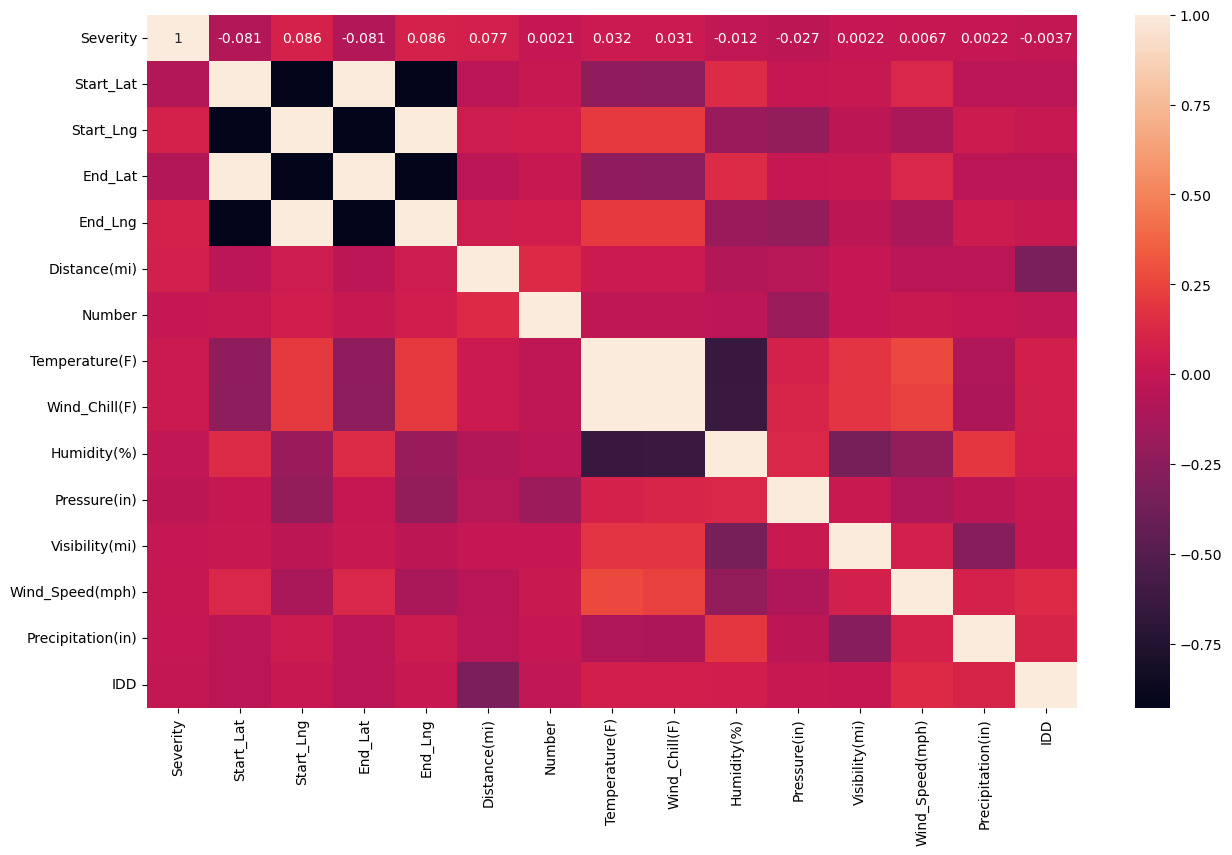

In [35]:
plt.figure(figsize=(15 ,9))
sns.heatmap(df_num.corr() , annot=True)

In [36]:
cities = df1['City'].unique()
len(cities)

1029

In [37]:
accidents_by_cities = df1['City'].value_counts()
accidents_by_cities

City
Los Angeles    20473
Sacramento     10601
San Diego       6824
Riverside       4535
Bakersfield     4520
               ...  
Likely             1
Glencoe            1
Woodacre           1
Cuyama             1
West Hills         1
Name: count, Length: 1029, dtype: int64

In [38]:
accidents_by_cities[:10]

City
Los Angeles       20473
Sacramento        10601
San Diego          6824
Riverside          4535
Bakersfield        4520
San Bernardino     4093
San Jose           3857
Ontario            3358
Fresno             3324
Anaheim            3257
Name: count, dtype: int64

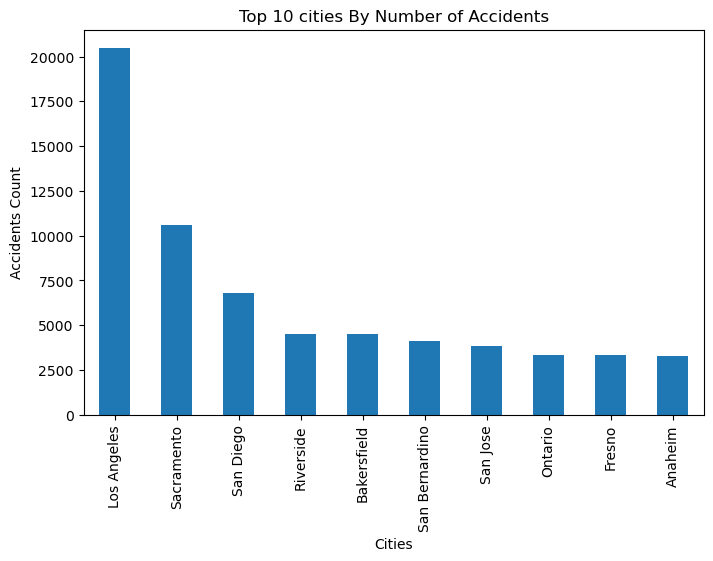

In [39]:
fig, ax = plt.subplots(figsize=(8,5))
accidents_by_cities[:10].plot(kind='bar')
ax.set(title = 'Top 10 cities By Number of Accidents',
       xlabel = 'Cities',
       ylabel = 'Accidents Count')
plt.show()


In [40]:
accidents_severity = df1.groupby('Severity').count()['ID']
accidents_severity

Severity
1      5396
2    227547
3      4051
4      2328
Name: ID, dtype: int64

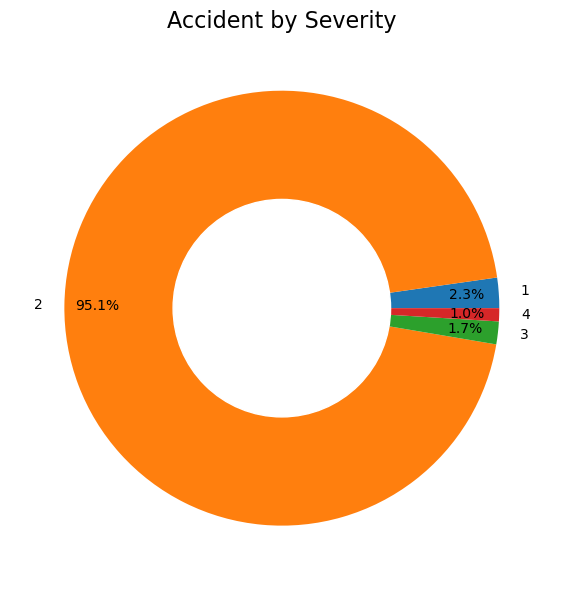

In [41]:
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))
label = [1,2,3,4]
plt.pie(accidents_severity, labels=label,
        autopct='%1.1f%%', pctdistance=0.85)
circle = plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
ax.set_title("Accident by Severity",fontdict={'fontsize': 16})
plt.tight_layout()
plt.show()

In [59]:
df1['Start_Lat'].dtypes

dtype('<M8[ns]')

In [60]:
df1['End_Lat'].dtypes

dtype('<M8[ns]')

In [57]:
print(df1.columns)

Index(['ID', 'Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Country', 'Timezone', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'IDD'],
      dtype='object')


In [58]:
import pandas as pd
df1['Start_Lat'] = pd.to_datetime(df1['Start_Lat'], format="%d-%m-%Y %H:%M", errors='coerce')
df1['End_Lat'] = pd.to_datetime(df1['End_Lat'], format="%d-%m-%Y %H:%M", errors='coerce')

In [63]:
df1['Start_Lat']
print(df1.iloc[2405:2410])

               ID  Severity Start_Lat   Start_Lng End_Lat     End_Lng  \
241165  A-2957828         2       NaT -118.239254     NaT -118.239243   
241166  A-2957829         2       NaT -118.227898     NaT -118.228216   
241172  A-2957835         2       NaT -122.725535     NaT -122.725885   
241173  A-2957836         2       NaT -117.522995     NaT -117.522818   
241179  A-2957842         2       NaT -117.565256     NaT -117.568146   

        Distance(mi)  Number          Street Side  ... Station   Stop  \
241165         0.023     NaN    S Alameda St    R  ...   False  False   
241166         0.045  2298.0      E Bliss St    R  ...   False  False   
241172         0.550     NaN   Redwood Hwy N    R  ...   False  False   
241173         0.017  7777.0   El Cerrito Rd    R  ...   False   True   
241179         0.167     NaN    Corona Fwy N    R  ...   False  False   

       Traffic_Calming Traffic_Signal Turning_Loop  Sunrise_Sunset  \
241165           False          False        False  

In [64]:
df1['End_Lat']
print(df1.iloc[2405:2410])

               ID  Severity Start_Lat   Start_Lng End_Lat     End_Lng  \
241165  A-2957828         2       NaT -118.239254     NaT -118.239243   
241166  A-2957829         2       NaT -118.227898     NaT -118.228216   
241172  A-2957835         2       NaT -122.725535     NaT -122.725885   
241173  A-2957836         2       NaT -117.522995     NaT -117.522818   
241179  A-2957842         2       NaT -117.565256     NaT -117.568146   

        Distance(mi)  Number          Street Side  ... Station   Stop  \
241165         0.023     NaN    S Alameda St    R  ...   False  False   
241166         0.045  2298.0      E Bliss St    R  ...   False  False   
241172         0.550     NaN   Redwood Hwy N    R  ...   False  False   
241173         0.017  7777.0   El Cerrito Rd    R  ...   False   True   
241179         0.167     NaN    Corona Fwy N    R  ...   False  False   

       Traffic_Calming Traffic_Signal Turning_Loop  Sunrise_Sunset  \
241165           False          False        False  

In [66]:
df1['Start_Lat'].fillna(pd.Timestamp("1970-01-01"), inplace=True)
df1['date'] = df1['Start_Lat'].dt.date
df1['time'] = df1['Start_Lat'].dt.time

In [67]:
df1['start_Lat'] = [d.date() for d in df1['Start_Lat']]
df1['start_Lat'] = [d.time() for d in df1['Start_Lat']]

In [69]:
df1['End_Date'] = df1['End_Lat'].apply(lambda x: x.date() if pd.notnull(x) else None)
df1['End_Time'] = df1['End_Lat'].apply(lambda x: x.time() if pd.notnull(x) else None)

In [71]:
df1['End_Lat']

1018      NaT
1065      NaT
1190      NaT
1201      NaT
1244      NaT
           ..
1048570   NaT
1048571   NaT
1048572   NaT
1048573   NaT
1048574   NaT
Name: End_Lat, Length: 239322, dtype: datetime64[ns]

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


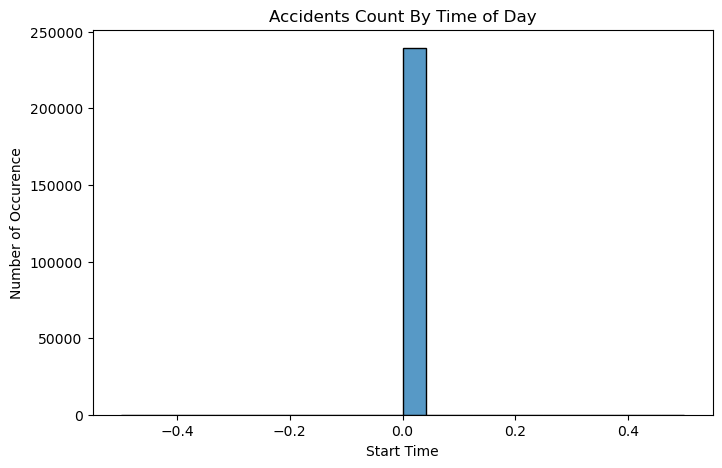

In [72]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(df1['Start_Lat'].dt.hour, bins = 24)

plt.xlabel("Start Time")
plt.ylabel("Number of Occurence")
plt.title('Accidents Count By Time of Day')

plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


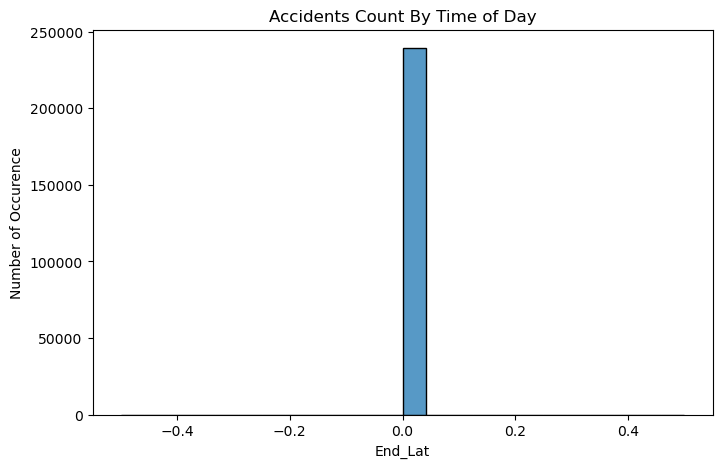

In [73]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(df1['Start_Lat'].dt.hour, bins = 24)

plt.xlabel("End_Lat")
plt.ylabel("Number of Occurence")
plt.title('Accidents Count By Time of Day')

plt.show()

In [74]:
del df1['Start_Lat']
del df1['End_Lat']

In [53]:
%matplotlib inline
import os

In [78]:
Weather_Condition = df1['Weather_Condition'].value_counts()

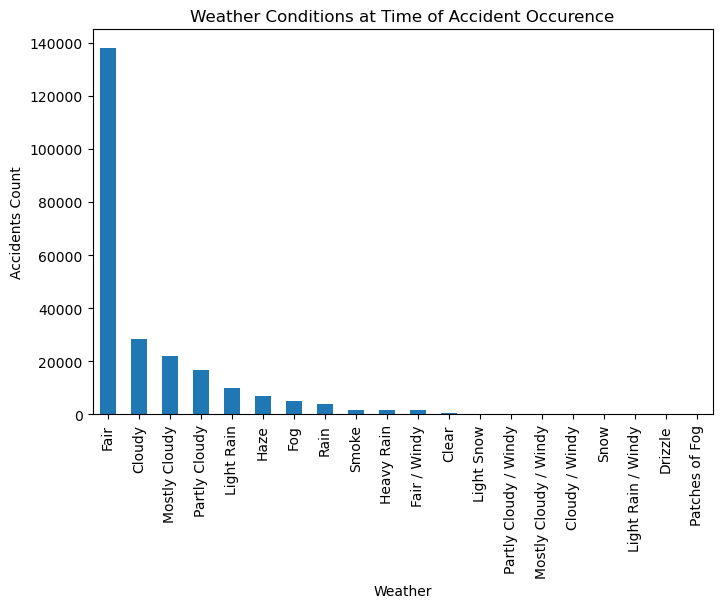

In [79]:
fig, ax = plt.subplots(figsize=(8,5))
Weather_Condition.sort_values(ascending=False)[:20].plot(kind='bar')
ax.set(title = 'Weather Conditions at Time of Accident Occurence',
       xlabel = 'Weather',
       ylabel = 'Accidents Count')
plt.show()

In [55]:
df1.groupby('Severity').count()['IDD']

Severity
1      5396
2    227547
3      4051
4      2328
Name: IDD, dtype: int64

<Axes: xlabel='Severity', ylabel='Start_Lat'>

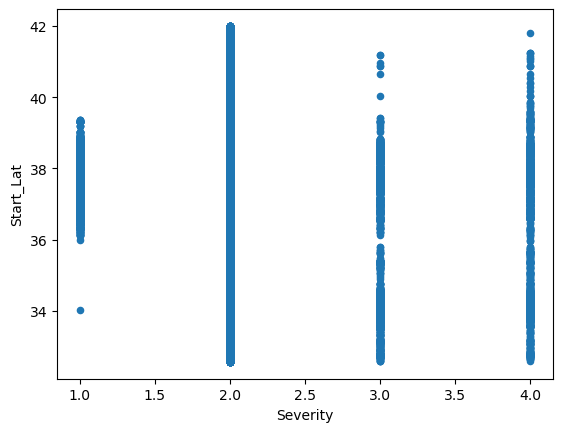

In [80]:
df_num.plot(kind='scatter', y='Start_Lat', x='Severity')

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


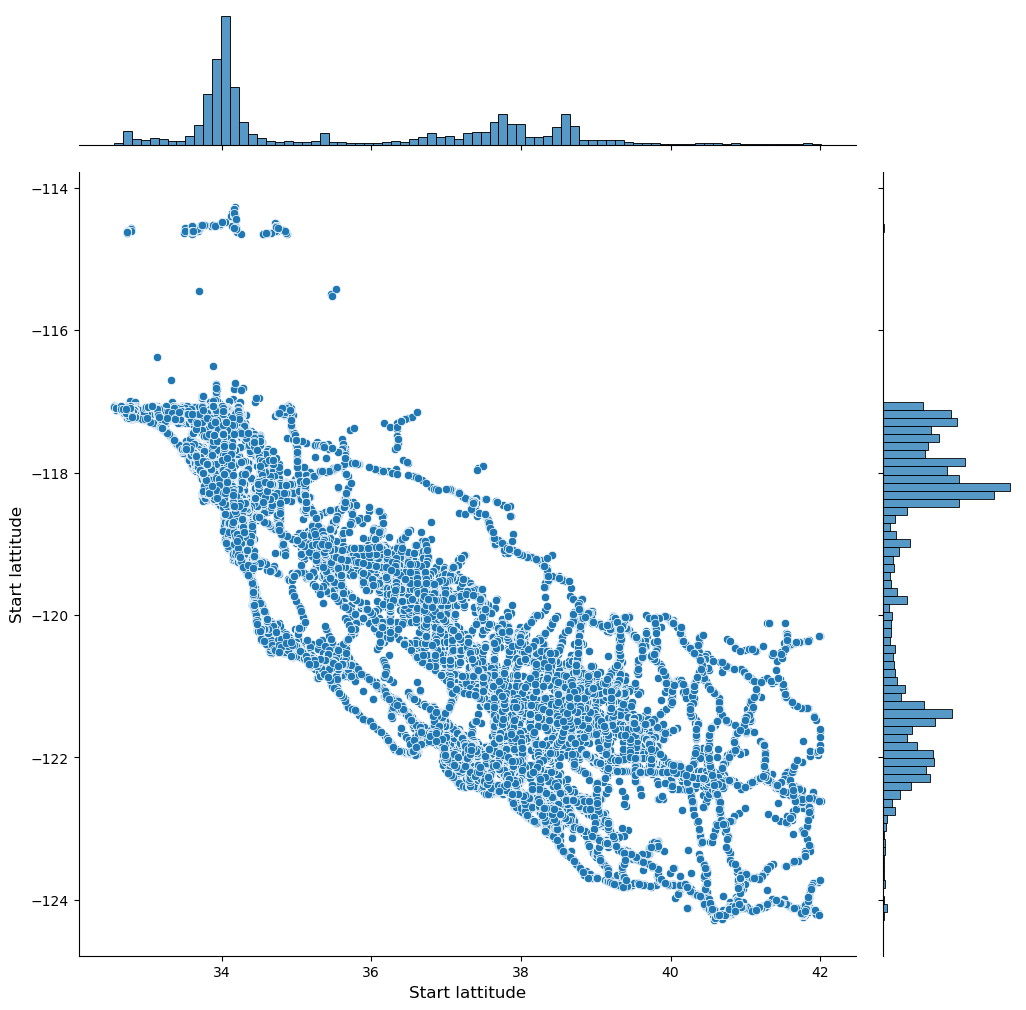

In [81]:
sns.jointplot(x=df_num.Start_Lat.values , y=df_num.Start_Lng.values,height=10)
plt.ylabel('Start lattitude', fontsize=12)
plt.xlabel('Start lattitude', fontsize=12)
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


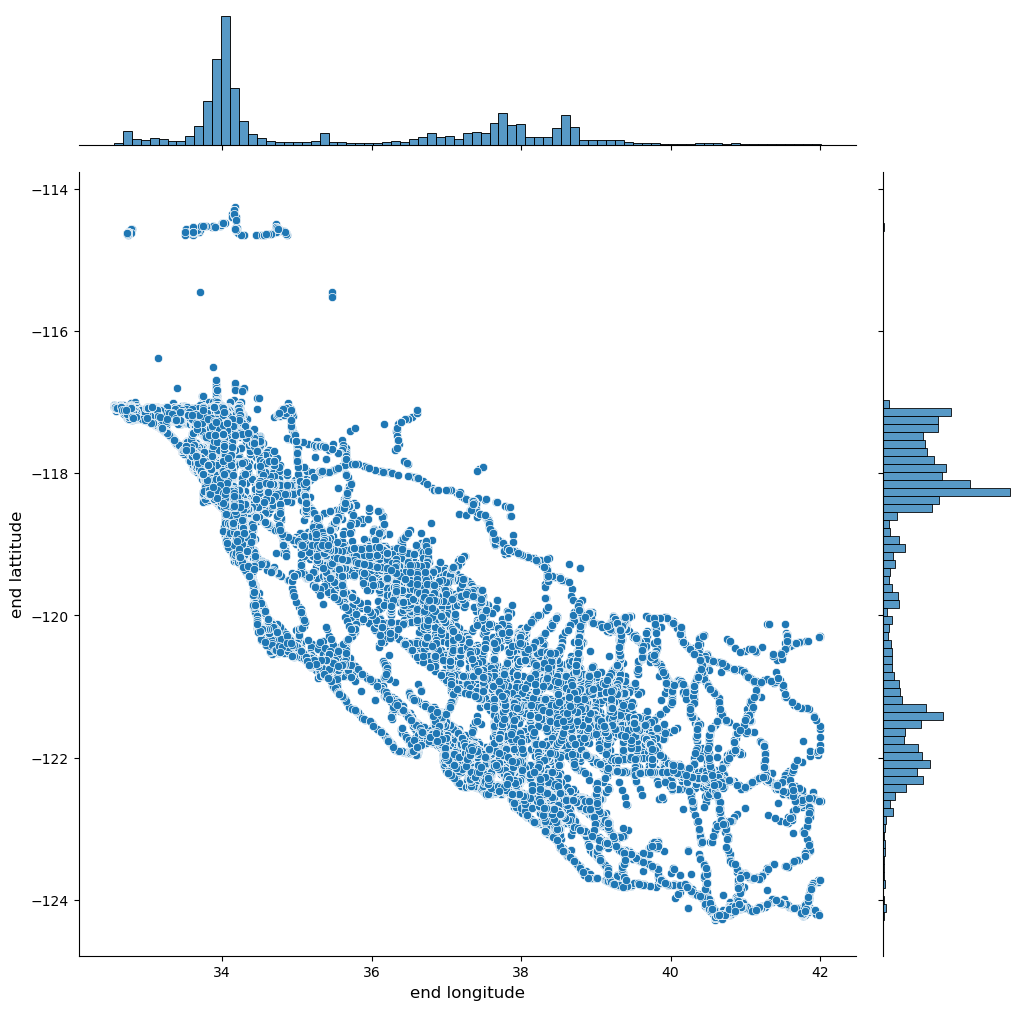

In [82]:
sns.jointplot(x=df_num.End_Lat.values , y=df_num.End_Lng.values,height=10)
plt.ylabel('end lattitude', fontsize=12)
plt.xlabel('end longitude', fontsize=12)
plt.show()